In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('../artifacts/data/MejoresLibros.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   99 non-null     int64  
 1   Titulo       99 non-null     object 
 2   Autor        99 non-null     object 
 3   NotaMedia    99 non-null     object 
 4   Rango        99 non-null     object 
 5   NumVotos     99 non-null     float64
 6   NumCriticas  99 non-null     int64  
 7   Genero       99 non-null     object 
 8   Editorial    99 non-null     object 
 9   AñoEdicion   99 non-null     object 
 10  Resumen      99 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 8.6+ KB


In [18]:
df.head()

,Unnamed: 0,Titulo,Autor,NotaMedia,Rango,NumVotos,NumCriticas,Genero,Editorial,AñoEdicion,Resumen
0,0,LAS LEGIONES MALDITAS,"POSTEGUILLO, SANTIAGO","8,64",Muy bueno,1.284,176,Histórica y aventuras,EDICIONES B,2008,La historia de las legiones que desafiaron a A...
1,1,TORMENTA DE ESPADAS. (CANCIÓN DE HIELO Y FUEGO 3),"MARTIN, GEORGE R.R.","8,58",Muy bueno,2.440,121,"Fantástica, ciencia ficción",GIGAMESH,2006,"Las huestes de los fugaces reyes de Poniente, ..."
2,2,JUEGO DE TRONOS. (CANCIÓN DE HIELO Y FUEGO 1),"MARTIN, GEORGE R.R.","8,47",Muy bueno,3.286,228,"Fantástica, ciencia ficción",GIGAMESH,2011,"Tras el largo verano, el invierno se acerca a ..."
3,3,AFRICANUS. El hijo del cónsul,"POSTEGUILLO, SANTIAGO","8,47",Muy bueno,1.414,196,Histórica y aventuras,EDICIONES B,2008,"A finales del siglo III a. C., Roma se encontr..."
4,4,LOS MISERABLES,VÍCTOR HUGO,"8,46",Muy bueno,1.522,182,Clásicos de la literatura,AUSTRAL,2012,"«Novela, por supuesto, pero también es Histori..."


## Data clean and EDA

In [19]:
df.drop('Unnamed: 0',inplace=True, axis=1)

In [20]:
df.Rango.value_counts()

Muy bueno    99
Name: Rango, dtype: int64

Como solo hay un rango, se puede eliminar:

In [35]:
df=df.drop('Rango',axis=1)

Lista de Generos en el top:

In [21]:
df.Genero.value_counts()

Novela negra, intriga, terror    16
Fantástica, ciencia ficción      15
Clásicos de la literatura        13
Literatura contemporánea         13
Narrativa                        11
Infantil y juvenil               11
Histórica y aventuras            10
Ficción literaria                 3
Romántica, erótica                3
Poesía, teatro                    2
No Ficción                        1
Biografías, Memorias              1
Name: Genero, dtype: int64

In [22]:
df.Editorial.value_counts()

DEBOLSILLO                 11
SALAMANDRA                 10
ALIANZA                     7
DESTINO                     6
MINOTAURO                   6
ESPASA                      6
GIGAMESH                    5
PLAZA & JANÉS               5
EDICIONES B                 4
PLANETA                     4
ALFAGUARA                   4
AUSTRAL                     4
TUSQUETS                    3
MOLINO                      3
LUMEN                       2
ANAGRAMA                    2
SEIX BARRAL                 2
QUINTETO                    1
PENGUIN                     1
GRIJALBO                    1
SUMA DE LETRAS              1
SIRUELA                     1
NÓRDICA                     1
TEMAS DE HOY                1
ROCA                        1
NUBE DE TINTA               1
MAEVA                       1
EDHASA                      1
LITERATURA RANDOM HOUSE     1
ZETA BOLSILLO               1
ALBA                        1
CÁTEDRA                     1
Name: Editorial, dtype: int64

In [23]:
df.AñoEdicion.value_counts()

2007    18
2006    14
2009    12
2010     9
2008     7
2013     5
2011     5
2016     4
2014     4
2012     4
2003     3
2015     3
2021     2
2017     1
1993     1
2000     1
2001     1
2005     1
(200     1
2002     1
2018     1
2020     1
Name: AñoEdicion, dtype: int64

Se convierte la columna NotaMedia a float:

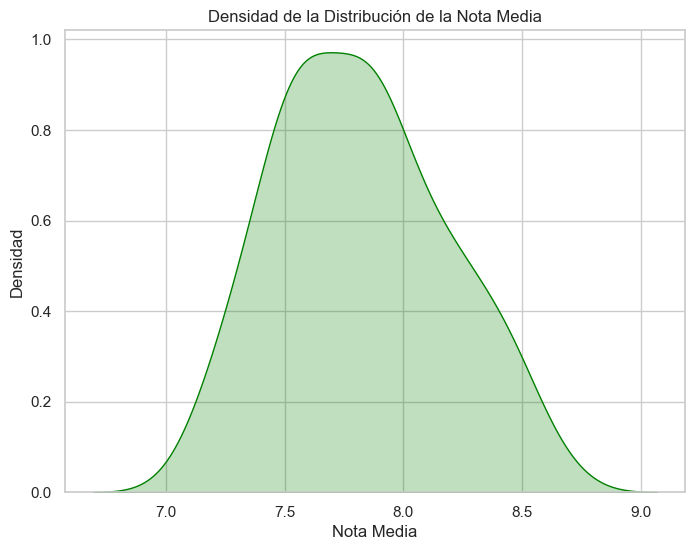

In [32]:
sns.set(style="whitegrid") 
df['NotaMedia'] = df['NotaMedia'].str.replace(',', '.').astype(float)

plt.figure(figsize=(8, 6))
sns.kdeplot(df['NotaMedia'], color='green', shade=True)  
plt.xlabel('Nota Media')
plt.ylabel('Densidad')
plt.title('Densidad de la Distribución de la Nota Media')
plt.show()

In [42]:

print('maximos votos: ',df['NumVotos'].max())
print('minimos votos: ',df['NumVotos'].min())
print('maximas criticas: ' ,df['NumCriticas'].max())
print('minimas criticas: ',df['NumCriticas'].min())




maximos votos:  5.494
minimos votos:  1.031
maximas criticas:  483
minimas criticas:  1


El libro con más votos es:

In [44]:
df[df['NumVotos']==df['NumVotos'].max()]

,Titulo,Autor,NotaMedia,NumVotos,NumCriticas,Genero,Editorial,AñoEdicion,Resumen
48,LA SOMBRA DEL VIENTO (El Cementerio de los Lib...,"RUIZ ZAFÓN, CARLOS",7.82,5.494,483,Narrativa,PLANETA,2006,Un amanecer de 1945 un muchacho es conducido p...


El libro con mayor relación Notamedia/numero de votos es:

In [47]:
df['Porcentaje'] = df['NumVotos']/df['NotaMedia'] 

# Encontrar el libro con el mayor porcentaje
libro_max_porcentaje = df[df['Porcentaje'] == df['Porcentaje'].max()]

# Imprimir el libro con el mayor porcentaje
libro_max_porcentaje

,Titulo,Autor,NotaMedia,NumVotos,NumCriticas,Genero,Editorial,AñoEdicion,Resumen,Porcentaje
48,LA SOMBRA DEL VIENTO (El Cementerio de los Lib...,"RUIZ ZAFÓN, CARLOS",7.82,5.494,483,Narrativa,PLANETA,2006,Un amanecer de 1945 un muchacho es conducido p...,0.702558
